In [1]:
library(tidyverse)
employees <- read_csv("_build/data/employee_data.csv")
employees$Salary <- parse_number(employees$Salary)
employees$Start_Date <- parse_date(employees$Start_Date, format = "%m/%d/%Y")
degreeLevels <- c("High School", "Associate's", "Bachelor's", "Master's", "Ph.D")
employees$Degree <- parse_factor(employees$Degree, levels = degreeLevels, ordered = TRUE)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --


v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  


-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Gender = col_character(),
  Age = col_double(),
  Rating = col_double(),
  Degree = col_character(),
  Start_Date = col_character(),
  Retired = col_logical(),
  Division = col_character(),
  Salary = col_character()
)


# Visualization

Data visualization is an essential tool for discovering and communicating insights in a simple, actionable way. Data science is problem-driven, and one of the easiest ways to quickly gain an understanding of the problem at hand is to visualize the relevant data. Although data visualization may seem less rigorous or scientific than the other statistical methods described in this note, visualizations often uncover important insights that are not captured in quantitative summaries of the data. Therefore, data visualization is an important component of any data scientist’s toolkit. 

Additionally, data visualizations allow managers and business analysts to communicate important information across large organizations. The old phrase “a picture is worth a thousand words” applies well – in business contexts, visualizations are often one of the best ways to communicate essential information quickly and effectively. Creative uses of color, shapes, and even animation can succinctly tell a compelling story. Interactive dashboards allow stakeholders to track key business metrics in real time. As a manager, all of these tools can help you and your team stay informed about different outcomes.

Each problem is different and calls for a unique approach when it comes to visualizing the relevant data. However, the following general principles can help produce effective visualizations.

+ Make sure your visualization is driven by a clear, well-formulated business question. Avoid visualization for its own sake.
+ Be honest. Visualizing data inaccurately can constitute a breach of trust between you and your audience.
+ Focus on storytelling. Your visualization should be compelling and inspire action among stakeholders.
+ Less is often more. A simple visualization that communicates one insight effectively is better than a complicated visualization that communicates multiple insights poorly.
+ Use the right color palette. If your visualization features multiple colors, you want those colors to be distinct and differentiable. Most of the modern software tools for data visualization come with a recommended set of color palettes.
+ Avoid color combinations that affect people with color blindness (red v. green, green v. brown, etc.)

## Quantitative Variables

In this section, we will review some of the data visualizations that are appropriate for quantitative variables. 

### Histograms

Often one of the best ways to get a quick understanding of your data is to visualize it in a few basic charts. The simplest of these is a **histogram**, which shows how a variable is distributed over a range of values. The range of values on the x-axis is divided into “buckets." The height of each bucket in a histogram represents the number of observations that fall within that bucket’s range. We can create a histogram in R with the `hist()` function. 

```{admonition} Syntax
`hist(x)`
+ *Required arguments*
  - `x`: The atomic vector of values.
```

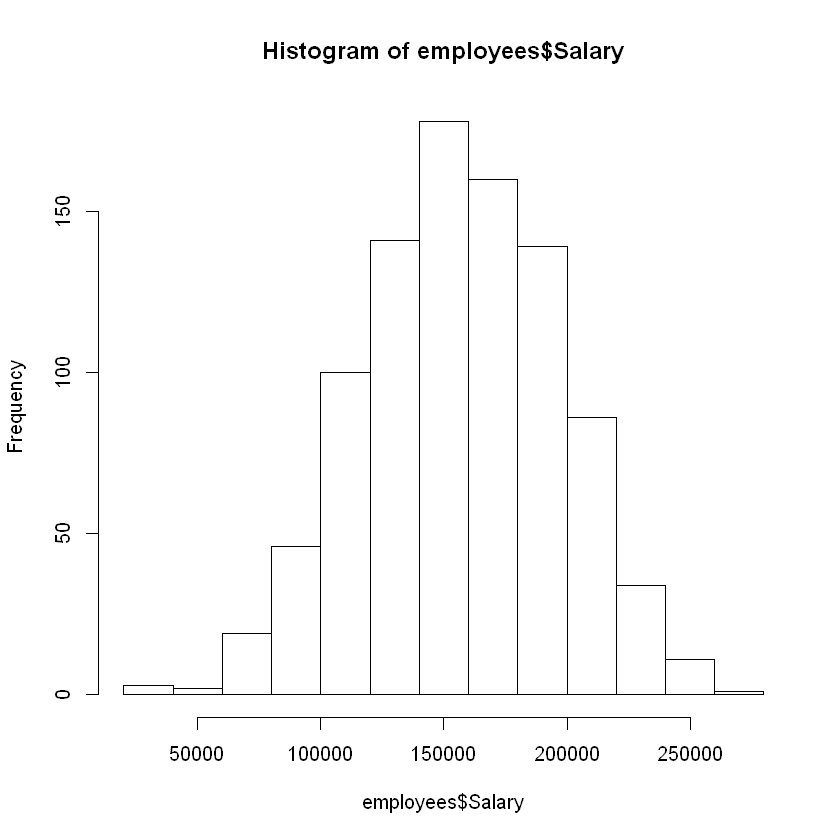

In [2]:
hist(employees$Salary)

### Boxplots 

Another very useful chart is the **boxplot**, which is an alternative way to visualize the distribution and spread of a variable. The boxplot serves as a visual display of five main values:

1. The median (*i.e.*, the 50th percentile) of the data, represented by the middle line of the box.
2. The 25th and 75th percentiles of the data, represented by the sides of the box (Q1 and Q3 respectively).
    + The Interquartile Range (IQR) is the distance between the 25th and 75th percentiles, that is:
      + IQR = Q3 - Q1
3. The minimum and maximum values, which form the ends of the boxplot’s “whiskers”. Somewhat confusingly, these points are actually not the smallest and largest values in the data set. Instead, these two points are calculated as follows:
    + "minimum" = Q1 - 1.5 * IQR
    + "maximum" = Q3 + 1.5 * IQR

In R, any points that fall to the left of (*i.e.*, less than) the minimum or to the right of (*i.e.*, greater than) the maximum are plotted individually and treated as outliers.

```{figure} ../images/rboxplot.png
---
height: 300px
name: boxplot
---
Boxplot
```

We can create a boxplot in R with the `boxplot()` function. 

```{admonition} Syntax
boxplot(x)
+ *Required arguments*
  - `x`: The atomic vector of values.
```

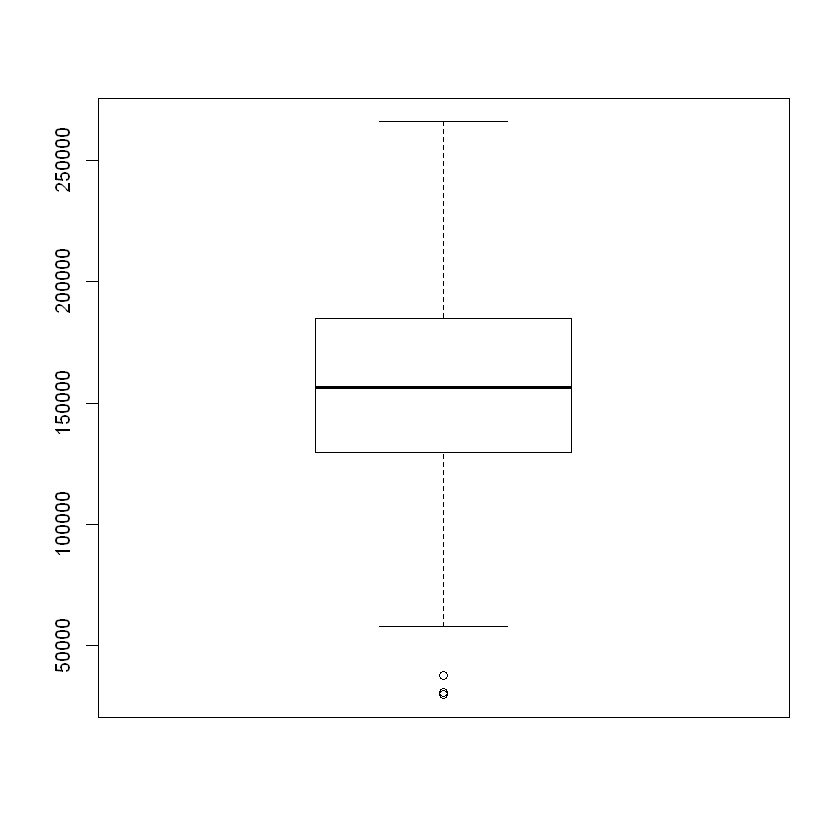

In [3]:
boxplot(employees$Salary)

### Side-by-Side Box Plots

**Side-by-side boxplots** can be used to visualize the distribution of a variable over each category of a categorical variable. The code below creates a box plot of the `Salary` variable for each value of `Degree` in `employees`. Note that the `boxplot()` function uses the tilde (`~`) notation; the quantitative variable we're analyzing goes before the tilde, and the categorical variable comes after.

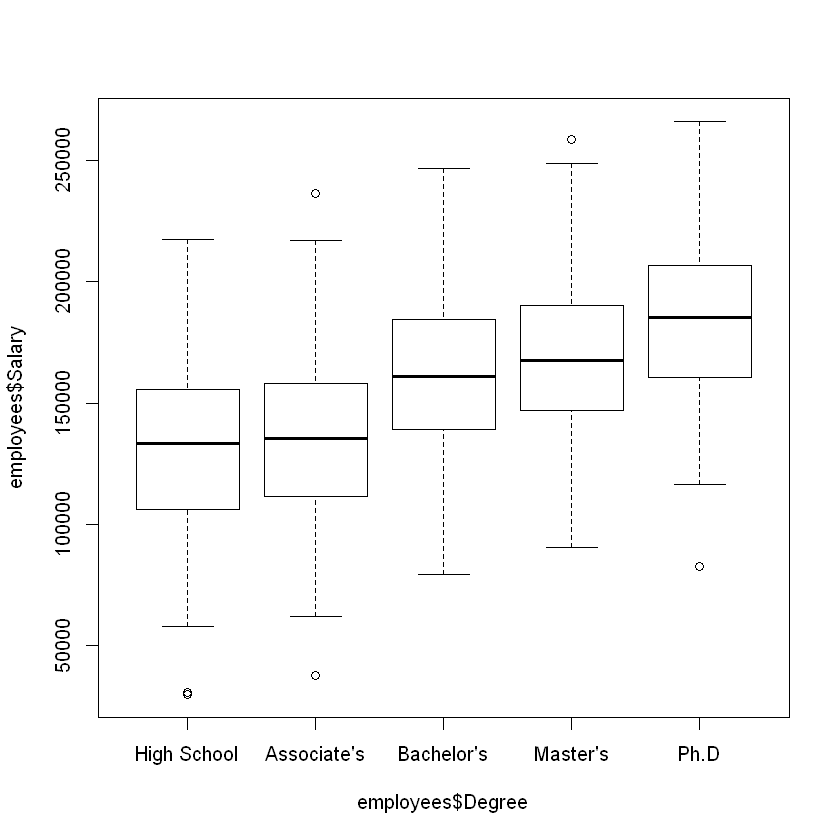

In [4]:
boxplot(employees$Salary ~ employees$Degree)

### Scatter Plots

**Scatter plots** can be used to get a quick feel for how two quantitative variables are related. The `plot()` function takes two variables as inputs; the first variable is plotted on the x-axis, and the second variable is plotted on the y-axis.

```{admonition} Syntax
plot(x, y)
+ *Required arguments*
  - `x` & `y`: The atomic vectors of values.
```

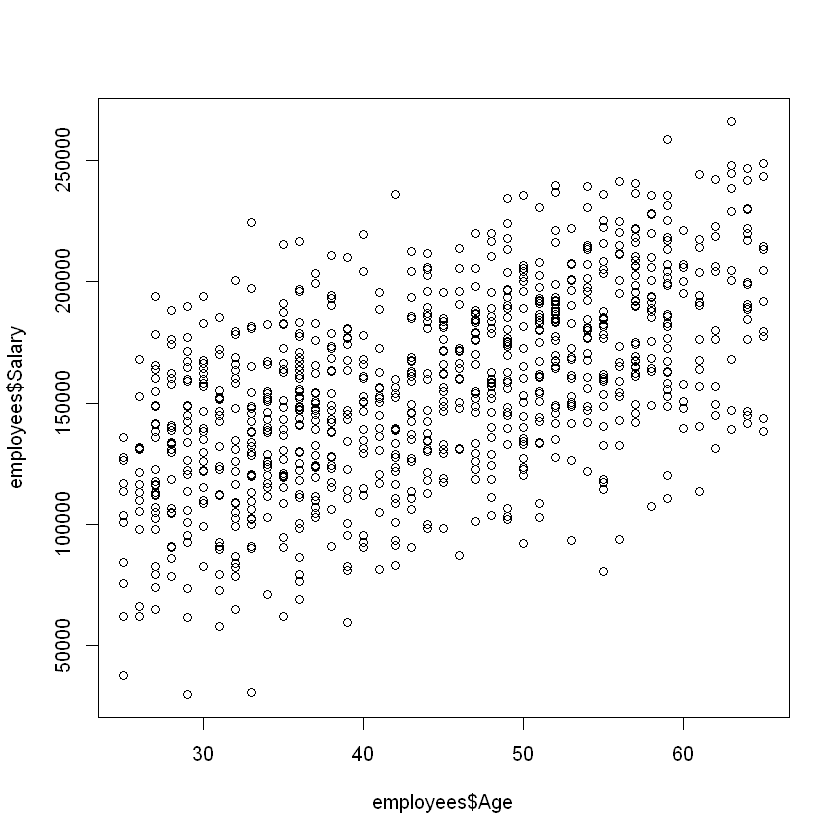

In [5]:
plot(employees$Age, employees$Salary)

## Categorical Variables

In this section, we will review some of the data visualizations that are appropriate for quantitative variables. 

### Bar Plots

For categorical variables, **bar plots** can be used to visualize how the data are distributed over the different categories. Specifically, a bar plot shows the number of observations corresponding to each category of a categorical variable, such as `Division`. To create the barplot, we first need to create a table of the categorical variable we are examining, then apply `barplot}()` to that table.

```{admonition} Syntax
`barplot(table(x))`
+ *Required arguments*
  - `x`: The atomic vector of values.
```

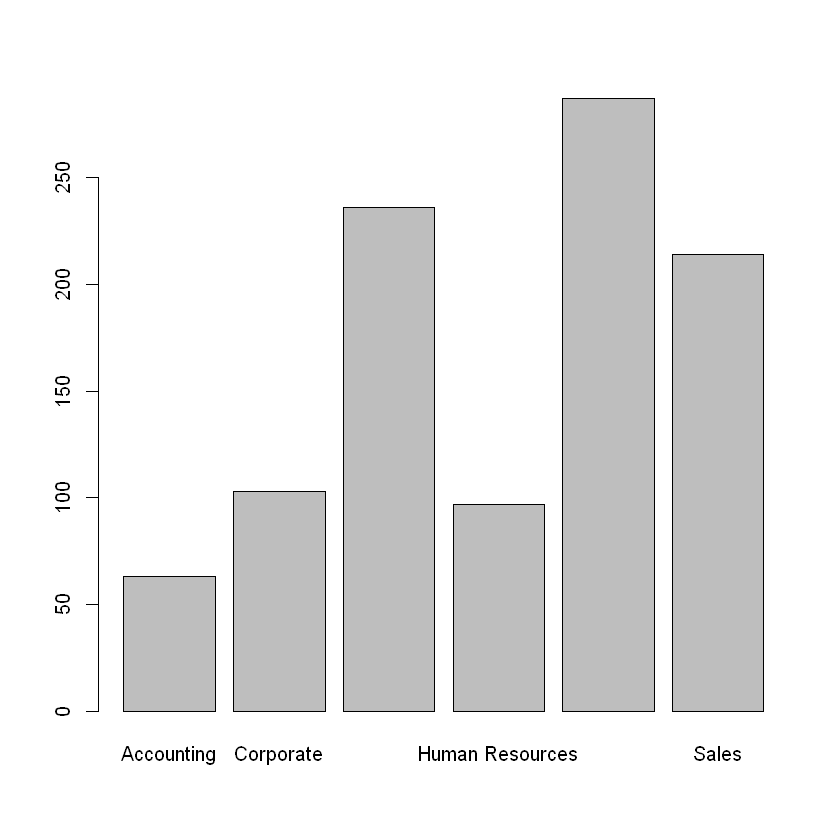

In [6]:
barplot(table(employees$Division))

By combining the `barplot()` command and the `table()` and `prop.table()` commands, we can create a **stacked barplot** for two categorical variables, such as `Division` and `Gender`. Recall that the `margin` argument of the `prop.table()` command (`2` in this case) indicates that we wish to calculate the proportion of observations by column rather than by row. The `legend` parameter adds a legend with the `Male` and `Female` labels for each color.

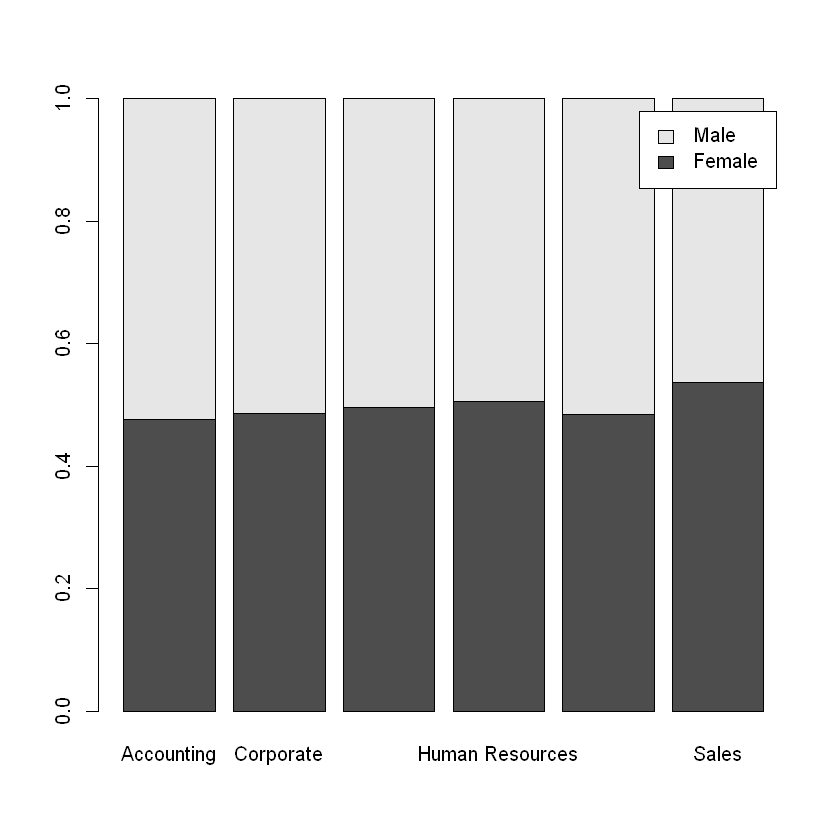

In [7]:
barplotTable <- prop.table(table(employees$Gender,employees$Division), 2)
barplot(barplotTable, legend=rownames(barplotTable))

### Pie Chart

Alternatively, we can visualize a categorical variable with a pie chart using the `pie()` function:

```{admonition} Syntax
`pie(table(x))`
+ *Required arguments*
  - `x`: The atomic vector of values.
```

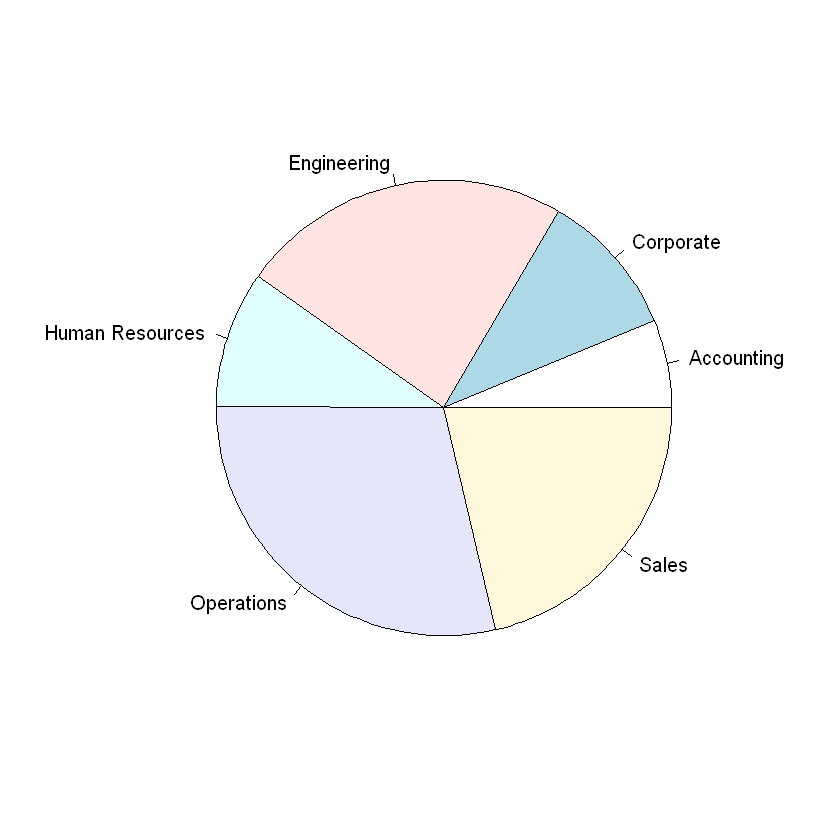

In [8]:
pie(table(employees$Division))